In [2]:
import pandas as pd 
import numpy as np 
import plotnine  # use ggplot
from plotnine import *
import os, sys, gc 
from tqdm.notebook import tqdm 
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
os.getcwd()

'c:\\Users\\EonKim\\Desktop\\github\\Recommend System\\10k'

In [4]:
books = pd.read_csv('dataset\\books.csv')
book_tags = pd.read_csv('dataset\\book_tags.csv')
ratings = pd.read_csv('dataset\\ratings.csv')
tags = pd.read_csv('dataset\\tags.csv')
to_read = pd.read_csv('dataset\\to_read.csv')

check metadata of books

In [5]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [6]:
books['small_image_url'].values[1]

'https://images.gr-assets.com/books/1474154022s/3.jpg'

In [9]:
print(cv2.__version__)

4.5.3


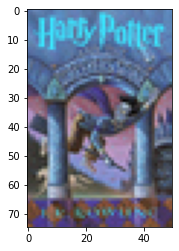

In [15]:
image = cv2.imread('dataset/3.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()

In [17]:
# select variable 

books = books[['book_id', 'authors', 'title', 'ratings_count', 'average_rating', 'language_code']].reset_index(drop=True)

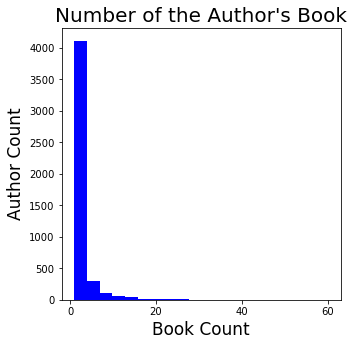

In [35]:
agg = books.groupby('authors')['authors'].agg({'count'})
plt.figure(figsize=(5, 5))
plt.hist(x = agg['count'], bins = 20, color='blue')
plt.xlabel('Book Count', size = 17)
plt.xticks( range(0, 61, 20))
plt.ylabel('Author Count', size = 17)
plt.title("Number of the Author's Book", size = 20)
plt.show()

In [51]:
print('책의 숫자', books['book_id'].nunique()) # counting unique / nunique == len(books['book_id'].unique())
print('저자의 수', books['authors'].nunique(), '\n')
print(pd.DataFrame(agg['count'].describe()).T)

책의 숫자 10000
저자의 수 4664 

        count      mean       std  min  25%  50%  75%   max
count  4664.0  2.144082  3.414442  1.0  1.0  1.0  2.0  60.0


In [52]:
agg['count'].idxmax()

'Stephen King'

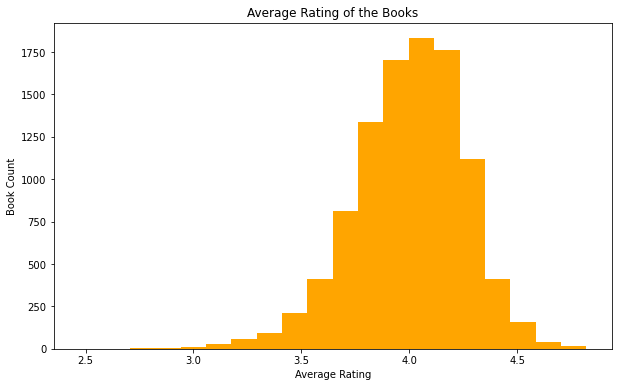

In [64]:
plt.figure(figsize = (10, 6))
plt.hist(books['average_rating'], bins = 20, color = 'Orange')
plt.xlabel('Average Rating')
plt.ylabel('Book Count')
plt.title('Average Rating of the Books')
plt.show()

In [67]:
books[books['average_rating'] <=3].shape[0]

14

In [71]:
books.sort_values(by = 'average_rating')[-5:][::-1]

,book_id,authors,title,ratings_count,average_rating,language_code
3627,24812,Bill Watterson,The Complete Calvin and Hobbes,28900,4.82,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng
861,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",73572,4.77,eng
7946,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,8953,4.76,eng
8853,95602,Francine Rivers,Mark of the Lion Trilogy,9081,4.76,en-US


In [73]:
pd.DataFrame(books['ratings_count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
ratings_count,10000.0,54001.2351,157369.956436,2716.0,13568.75,21155.5,41053.5,4780653.0


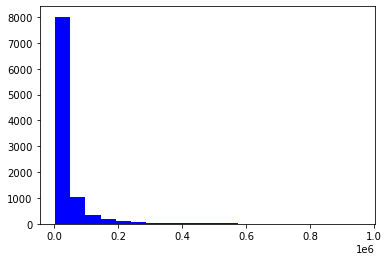

In [83]:
plt.hist(books[books['ratings_count'] < 1000000]['ratings_count'], bins = 20, color = 'blue')
plt.xticks()
plt.show()

In [84]:
books.sort_values(by = 'ratings_count', ascending = False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
0,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653,4.34,eng
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
2,41865,Stephenie Meyer,"Twilight (Twilight, #1)",3866839,3.57,en-US
3,2657,Harper Lee,To Kill a Mockingbird,3198671,4.25,eng
4,4671,F. Scott Fitzgerald,The Great Gatsby,2683664,3.89,eng


In [92]:
agg = pd.DataFrame(books['language_code'].value_counts()).reset_index()
agg.columns = ['language_code', 'count']

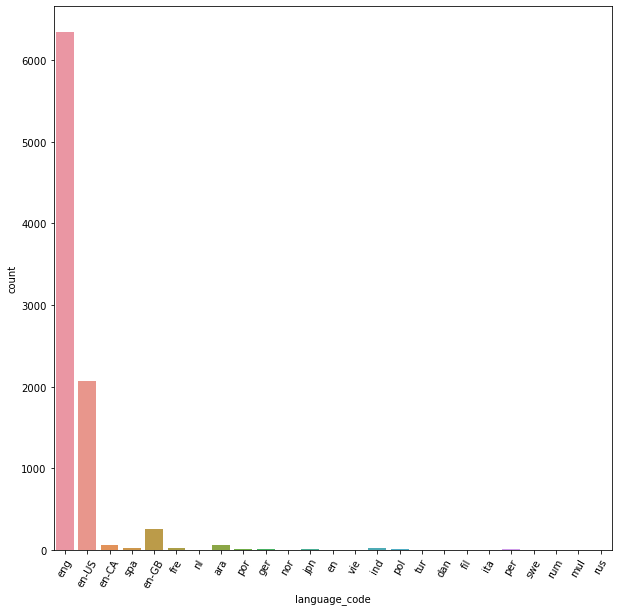

In [102]:
plt.figure(figsize = (10, 10))
sns.countplot(data = books, x = 'language_code')
plt.xticks(rotation = 60)
plt.show()

In [103]:
books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [104]:
books.isnull().sum()

book_id              0
authors              0
title                0
ratings_count        0
average_rating       0
language_code     1084
dtype: int64

In [105]:
ratings

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [113]:
# ratings = 고객이 책에대한 평점을 매긴 자료 9188 개가 메타데이터에 없다..
# content based Recommeder를 하게 되면 성능이 좋지 않다.
len(set(ratings['book_id'].unique()).difference(set(books['book_id'].unique())))

9188

실제 평점을 부여했지만, 메타정보에 있는 책은 812건 밖에 없음..

In [114]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [115]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [118]:
books_tags = pd.merge(tags, book_tags, how='left', on = 'tag_id')
books_tags

,tag_id,tag_name,goodreads_book_id,count
0,0,-,665,3
1,0,-,81176,5
2,0,-,147074,2
3,0,-,2983489,3
4,0,-,6713071,4
...,...,...,...,...
999907,34248,Ｆａｖｏｒｉｔｅｓ,8520610,374
999908,34248,Ｆａｖｏｒｉｔｅｓ,9361589,3765
999909,34249,Ｍａｎｇａ,248871,222
999910,34250,ＳＥＲＩＥＳ,28866,24


In [149]:
agg = books_tags.groupby(['tag_name'])['count'].agg({'sum'})
agg = agg.sort_values(by = 'sum' ,ascending = False).reset_index()
agg.head()

,tag_name,sum
0,to-read,140718761
1,currently-reading,7507958
2,favorites,4503173
3,fiction,3688819
4,fantasy,3548157


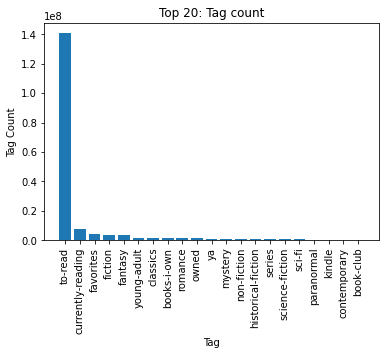

In [168]:
plt.bar(x = agg.loc[:20, 'tag_name'], height = agg.loc[:20, 'sum'] )
plt.xticks(rotation = 90)
plt.title('Top 20: Tag count' )
plt.xlabel('Tag')
plt.ylabel('Tag Count')
plt.show()

In [172]:
pd.DataFrame(agg['sum'].describe()).T

,count,mean,std,min,25%,50%,75%,max
sum,34252.0,6097.490716,762709.169868,-1.0,3.0,10.0,52.0,140718761.0


In [174]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'count'}).reset_index()
agg

,user_id,count
0,1,3
1,2,3
2,3,2
3,4,3
4,5,5
...,...,...
53419,53420,6
53420,53421,8
53421,53422,18
53422,53423,2


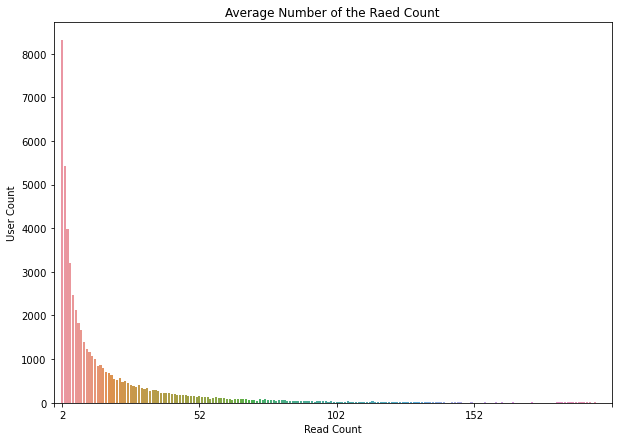

In [187]:
plt.figure(figsize = (10, 7))
sns.countplot(data = agg, x = 'count')
plt.xticks(ticks=[-3, 0, 50, 100, 150, 200])
plt.xlabel('Read Count')
plt.ylabel('User Count')
plt.title('Average Number of the Raed Count')
plt.show()

In [188]:
pd.DataFrame(agg['count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
count,53424.0,18.376685,26.26869,2.0,3.0,8.0,22.0,200.0


In [189]:
books[books['book_id'].isin([1, 2, 3, 4, 5, 6, 7, 8])] # Series books 

,book_id,authors,title,ratings_count,average_rating,language_code
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
17,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,1832823,4.53,eng
20,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,1735368,4.46,eng
23,6,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,1753043,4.53,eng
26,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,1678823,4.54,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng


In [203]:
agg = ratings[ratings['book_id'].isin([1, 2, 3, 4, 5, 6, 7, 8])].groupby(['user_id'])['book_id'].agg({'nunique'}).reset_index()
agg = agg.groupby(['nunique'])['user_id'].agg({'count'}).reset_index()

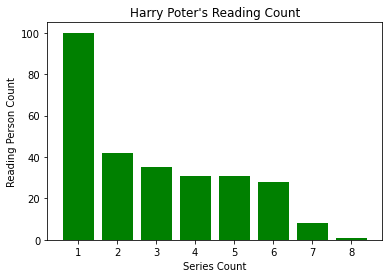

In [208]:
plt.bar(x = agg.loc[:,'nunique'], height = agg.loc[:,'count'], color = 'green')
plt.xlabel('Series Count')
plt.ylabel('Reading Person Count')
plt.title("Harry Poter's Reading Count")
plt.show()

In [209]:
agg['ratio'] = agg['count'] / agg['count'].sum()
agg[['nunique', 'ratio']].T

,0,1,2,3,4,5,6,7
nunique,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
ratio,0.362319,0.152174,0.126812,0.112319,0.112319,0.101449,0.028986,0.003623


In [6]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
agg.head() # 1번 유저의 임의로 몇개의 데이터를 train, test로 나누어 진행 .

,user_id,unique
0,1,"[1180, 4893, 6285]"
1,2,"[8034, 8855, 9762]"
2,3,"[9014, 9049]"
3,4,"[3273, 3469, 8464]"
4,5,"[4829, 6646, 6703, 7487, 8072]"


In [7]:
agg['train'] = agg['unique'].apply(lambda x: np.random.choice(x, len(x) // 2))
agg.head()

,user_id,unique,train
0,1,"[1180, 4893, 6285]",[4893]
1,2,"[8034, 8855, 9762]",[8034]
2,3,"[9014, 9049]",[9014]
3,4,"[3273, 3469, 8464]",[8464]
4,5,"[4829, 6646, 6703, 7487, 8072]","[6703, 4829]"


In [8]:
test = []
for i in tqdm(range(0, agg.shape[0])):
    test_rec = list(set(agg.loc[1,'unique']).difference(set(agg.loc[1, 'train'])))
    test.append(test_rec)
agg['test'] = test 

In [9]:
train_map = agg[['user_id', 'train']]

# unnest tags
train_map_unnest = np.dstack(
    (
        np.repeat(train_map.user_id.values, list(map(len, train_map.train))), 
        np.concatenate(train_map.train.values)
    )
)

train_map_unnest = pd.DataFrame(data = train_map_unnest[0], columns = train_map.columns)
train_map_unnest.head()

,user_id,train
0,1,4893
1,2,8034
2,3,9014
3,4,8464
4,5,6703


In [10]:
test_map = agg[['user_id', 'test']]

# unnest tags
test_map_unnest = np.dstack(
    (
        np.repeat(test_map.user_id.values, list(map(len, test_map.test))), 
        np.concatenate(test_map.test.values)
    )
)

test_map_unnest = pd.DataFrame(data = test_map_unnest[0], columns = test_map.columns)
test_map_unnest.head()

,user_id,test
0,1,9762
1,1,8855
2,2,9762
3,2,8855
4,3,9762


In [11]:
train_map_unnest.columns = ['user_id', 'book_id']
test_map_unnest.columns = ['user_id', 'book_id']
train_map_unnest.to_csv("train.csv", index=False)
test_map_unnest.to_csv("test.csv", index=False)